# Example: Calculate SWI from ASCAT

Import all necessary dependencies:

In [1]:
%matplotlib inline

import warnings
from pathlib import Path
from ascat.read_native.cdr import AscatGriddedNcTs
from pytesmo.time_series.filters import exp_filter

import os
import matplotlib.pyplot as plt


Set up the ascat reader:

In [2]:
testdata_path = Path(".").resolve().parent.parent / "tests" / "test-data"
ascat_data_folder = testdata_path / "sat" / "ascat" / "netcdf" / "55R22"
ascat_grid_fname = testdata_path / "sat" / "ascat" / "netcdf" / "grid" / "TUW_WARP5_grid_info_2_1.nc"
static_layer_path = testdata_path / "sat" / "h_saf" / "static_layer"


#init the AscatSsmCdr reader with the paths
with warnings.catch_warnings():
    warnings.filterwarnings('ignore') # some warnings are expected and ignored
    
    ascat_reader = AscatGriddedNcTs(
        ascat_data_folder,
        "TUW_METOP_ASCAT_WARP55R22_{:04d}",
        grid_filename=ascat_grid_fname,
        static_layer_path=static_layer_path
    )

Read a point in Northern Italy:

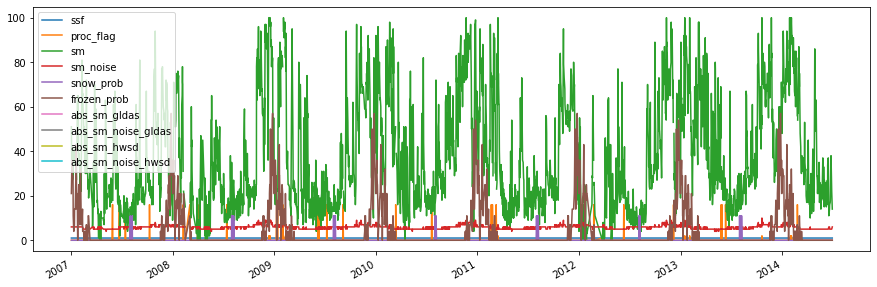

In [3]:
# point at (11,45)
ascat_ts = ascat_reader.read(2302069, mask_ssf=True, mask_frozen_prob=80, mask_snow_prob=20)
ascat_ts.plot(figsize=(15, 5));

Apply the exponential filter to calculate SWI from SM:

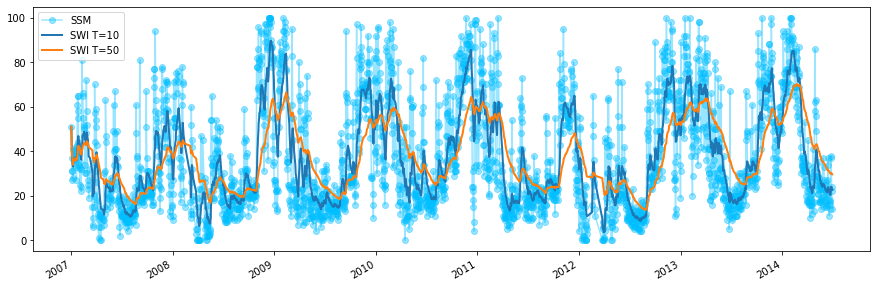

In [4]:
# Drop NA measurements
ascat_sm_ts = ascat_ts[['sm', 'sm_noise']].dropna()

# Get julian dates of time series
jd = ascat_sm_ts.index.to_julian_date().values

# Calculate SWI T=10
ascat_sm_ts['swi_t10'] = exp_filter(ascat_sm_ts['sm'].values, jd, ctime=10)
ascat_sm_ts['swi_t50'] = exp_filter(ascat_sm_ts['sm'].values, jd, ctime=50)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ascat_sm_ts['sm'].plot(ax=ax, alpha=0.4, marker='o',color='#00bfff', label='SSM')
ascat_sm_ts['swi_t10'].plot(ax=ax, lw=2,label='SWI T=10')
ascat_sm_ts['swi_t50'].plot(ax=ax, lw=2,label='SWI T=50')
plt.legend();